# Demo: `Tracks` and `Playlist`

Here we'll:

* Search for tracks using `Tracks.search`.
* See the search results from the dict-like `tracks` instance
* Display the search results in a pandas DataFrame.
* Create a playlist called "my_test_playlist" with the selected tracks.
* Get the URL of the newly created playlist.
* Delete a playlist
* Instantiate a `Playlist` object using a URL.
* Look at audio features aof this playlist



Import the necessary classes from the sung.base module

In [2]:
from sung.base import Tracks, Playlist

Search for tracks with the query 'Love', limiting the results to 7
This will return a Tracks object containing the search results

In [3]:
tracks = Tracks.search(query='Love', limit=7)

You can also make a `tracks` object by passing a list of track IDs or urls


In [52]:
track_ids = [
    '1vrd6UOGamcKNGnSHJQlSt',
    '3CeCwYWvdfXbZLXFhBrbnf',
    '1dGr1c8CrMLDpV6mPbImSI',
    '0u2P5u6lvoDfwTYjAADbn4',
    'https://open.spotify.com/track/6nGeLlakfzlBcFdZXteDq7',  # url
    'https://open.spotify.com/track/6dBUzqjtbnIa1TwYbyw5CM',   # url
    'spotify:track:7hR22TOX3RorxJPcsz5Wbo',  # uri
]

tracks = Tracks(track_ids)

`tracks` is a `Mapping` (that means "dict-like"), so you can do what you do with dicts...

Like listing the tracks' keys (IDs)

In [20]:
list(tracks)

['1vrd6UOGamcKNGnSHJQlSt',
 '3CeCwYWvdfXbZLXFhBrbnf',
 '1dGr1c8CrMLDpV6mPbImSI',
 '0u2P5u6lvoDfwTYjAADbn4',
 '6nGeLlakfzlBcFdZXteDq7',
 '6dBUzqjtbnIa1TwYbyw5CM',
 '7hR22TOX3RorxJPcsz5Wbo']

Like Accessing the value of a track for a given key. 
The value is a bunch of metadata about the track.

In [18]:
track_metadata = tracks['1dGr1c8CrMLDpV6mPbImSI']  # get metadata of track via it's id
assert isinstance(track_metadata, dict)
sorted(track_metadata)

['album',
 'artists',
 'available_markets',
 'disc_number',
 'duration_ms',
 'explicit',
 'external_ids',
 'external_urls',
 'href',
 'id',
 'is_local',
 'name',
 'popularity',
 'preview_url',
 'track_number',
 'type',
 'uri']

But we also have extras over normal dicts. 

We can get metadata of a track via it's index:

In [ ]:
track_metadata = tracks[2]

In [ ]:
list_of_track_metadatas = tracks[['6dBUzqjtbnIa1TwYbyw5CM', '1vrd6UOGamcKNGnSHJQlSt']]  # get metadata of tracks via a list of ids

In [17]:
list_of_track_metadatas = tracks[2:4]  # get metadata of tracks via a slice of ids

## Display the search results in a pandas DataFrame

Display the search results in a pandas DataFrame
The dataframe method converts the track metadata into a DataFrame for easy viewing.

(Note, you can also use the tracks.dataframe(keys, front_columns=...) to retrieve a data table with more control.)

In [ ]:
tracks.data


Search Results:


,name,duration_ms,popularity,explicit,id,album,artists,available_markets,disc_number,external_ids,external_urls,href,is_local,preview_url,track_number,type,uri
id,,,,,,,,,,,,,,,,,
1vrd6UOGamcKNGnSHJQlSt,Love Story,235266,62,False,1vrd6UOGamcKNGnSHJQlSt,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,{'isrc': 'USCJY0803275'},{'spotify': 'https://open.spotify.com/track/1v...,https://api.spotify.com/v1/tracks/1vrd6UOGamcK...,False,None,3,track,spotify:track:1vrd6UOGamcKNGnSHJQlSt
3CeCwYWvdfXbZLXFhBrbnf,Love Story (Taylor’s Version),235766,76,False,3CeCwYWvdfXbZLXFhBrbnf,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,{'isrc': 'USUG12100342'},{'spotify': 'https://open.spotify.com/track/3C...,https://api.spotify.com/v1/tracks/3CeCwYWvdfXb...,False,None,1,track,spotify:track:3CeCwYWvdfXbZLXFhBrbnf
1dGr1c8CrMLDpV6mPbImSI,Lover,221306,84,False,1dGr1c8CrMLDpV6mPbImSI,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,{'isrc': 'USUG11901473'},{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,False,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI
0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),200185,86,False,0u2P5u6lvoDfwTYjAADbn4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,{'isrc': 'USUM71804190'},{'spotify': 'https://open.spotify.com/track/0u...,https://api.spotify.com/v1/tracks/0u2P5u6lvoDf...,False,None,1,track,spotify:track:0u2P5u6lvoDfwTYjAADbn4
6nGeLlakfzlBcFdZXteDq7,Love Story,316280,74,False,6nGeLlakfzlBcFdZXteDq7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,{'isrc': 'FRUM71400048'},{'spotify': 'https://open.spotify.com/track/6n...,https://api.spotify.com/v1/tracks/6nGeLlakfzlB...,False,None,3,track,spotify:track:6nGeLlakfzlBcFdZXteDq7
6dBUzqjtbnIa1TwYbyw5CM,Lovers Rock,213920,85,False,6dBUzqjtbnIa1TwYbyw5CM,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,{'isrc': 'USHM21438143'},{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dBUzqjtbnIa...,False,https://p.scdn.co/mp3-preview/922a42db5aa8f8d3...,9,track,spotify:track:6dBUzqjtbnIa1TwYbyw5CM
7hR22TOX3RorxJPcsz5Wbo,Love Somebody,204828,86,False,7hR22TOX3RorxJPcsz5Wbo,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,{'isrc': 'USUG12406387'},{'spotify': 'https://open.spotify.com/track/7h...,https://api.spotify.com/v1/tracks/7hR22TOX3Ror...,False,None,1,track,spotify:track:7hR22TOX3RorxJPcsz5Wbo


## Make a playlist

Select three tracks from the search results
Here, we select the first three track IDs from the search results

In [4]:
selected_track_ids = tracks.track_ids[:3]
print("\nSelected Track IDs:")
print(selected_track_ids)


Selected Track IDs:
['6FjErEvVbuC32xi4QJUXM0', '1vrd6UOGamcKNGnSHJQlSt', '3CeCwYWvdfXbZLXFhBrbnf']


Create a new playlist named 'my_test_playlist' with the selected tracks
The create_from_track_list class method creates a new playlist with the given tracks

In [5]:
playlist = Playlist.create_from_track_list(
    track_list=selected_track_ids,
    playlist_name='my_test_playlist'
)
print(f"\nPlaylist '{playlist.playlist_id}' created successfully.")



Playlist '7BZcFvIWUnVzvZ5wpVt9cD' created successfully.


Get the playlist URL of the newly created playlist (go check it out!)

In [8]:
playlist.playlist_url

'https://open.spotify.com/playlist/7BZcFvIWUnVzvZ5wpVt9cD'

## Delete a playlist

We purposely tried to make deleting a playlist not as easy as the other actions. 
So we didn't attach a delete method to the playlist instance, but put this in a 
separate function you have to import. 
Also, we made that function verbose, and asking for confirmation by default. 
(But there's arguments to control that, so you can use `functools.partial` to 
make your own cowboy (not speaking and not asking for permission) version).

In [ ]:
from sung import delete_playlist

delete_playlist(playlist.playlist_id)

Instantiate a Playlist object using a URL.
This allows you to interact with the playlist, such as accessing its tracks.

In [4]:
top50_global_url = 'https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF?si=d6e0c7bc8f59473b'
top50_playlist = Playlist(top50_global_url)
df = top50_playlist.data
df['first_artist'] = df['artists'].apply(lambda x: x[0]['name'])
df['name_and_first_artist'] = df['name'] + ' - ' + df['first_artist']
top_5_tracks = top50_playlist.data.iloc[:5].name_and_first_artist
top_5_tracks

id
2plbrEY59IikOBgBGLjaoe          Die With A Smile - Lady Gaga
5vNRhkKd0yEAg8suGBpjeY                           APT. - ROSÉ
6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER - Billie Eilish
7ne4VBA60CxGM75vw0EYad        That’s So True - Gracie Abrams
7tI8dRuH2Yc6RuoTjxo4dU                           Who - Jimin
Name: name_and_first_artist, dtype: object

## Audio features

In [7]:
import pandas as pd

print(f"{top50_playlist.audio_features_df.shape=}")
top50_playlist.audio_features_df.iloc[0]


top50_playlist.audio_features_df.shape=(50, 17)


danceability                                                    0.521
energy                                                          0.592
key                                                                 6
loudness                                                       -7.777
mode                                                                0
speechiness                                                    0.0304
acousticness                                                    0.308
instrumentalness                                                  0.0
liveness                                                        0.122
valence                                                         0.535
tempo                                                         157.969
type                                                   audio_features
uri                              spotify:track:2plbrEY59IikOBgBGLjaoe
track_href          https://api.spotify.com/v1/tracks/2plbrEY59Iik...
analysis_url        

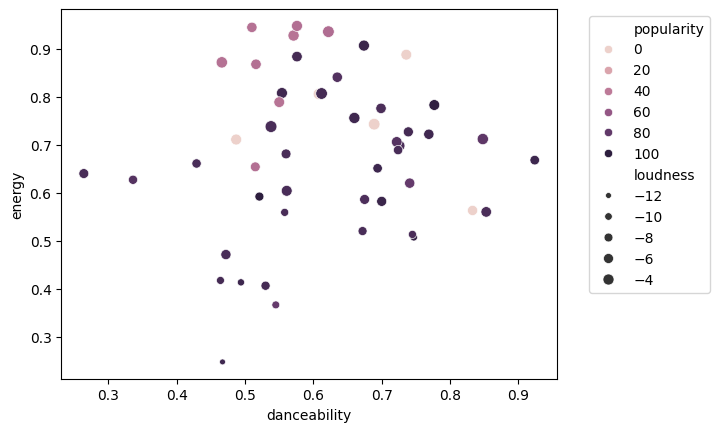

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.merge(top50_playlist.data, top50_playlist.audio_features_df, left_index=True, right_index=True)
# scatter plot with danceability and energy, colored by popularity, with size as loudness
sns.scatterplot(data=df, x='danceability', y='energy', hue='popularity', size='loudness')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

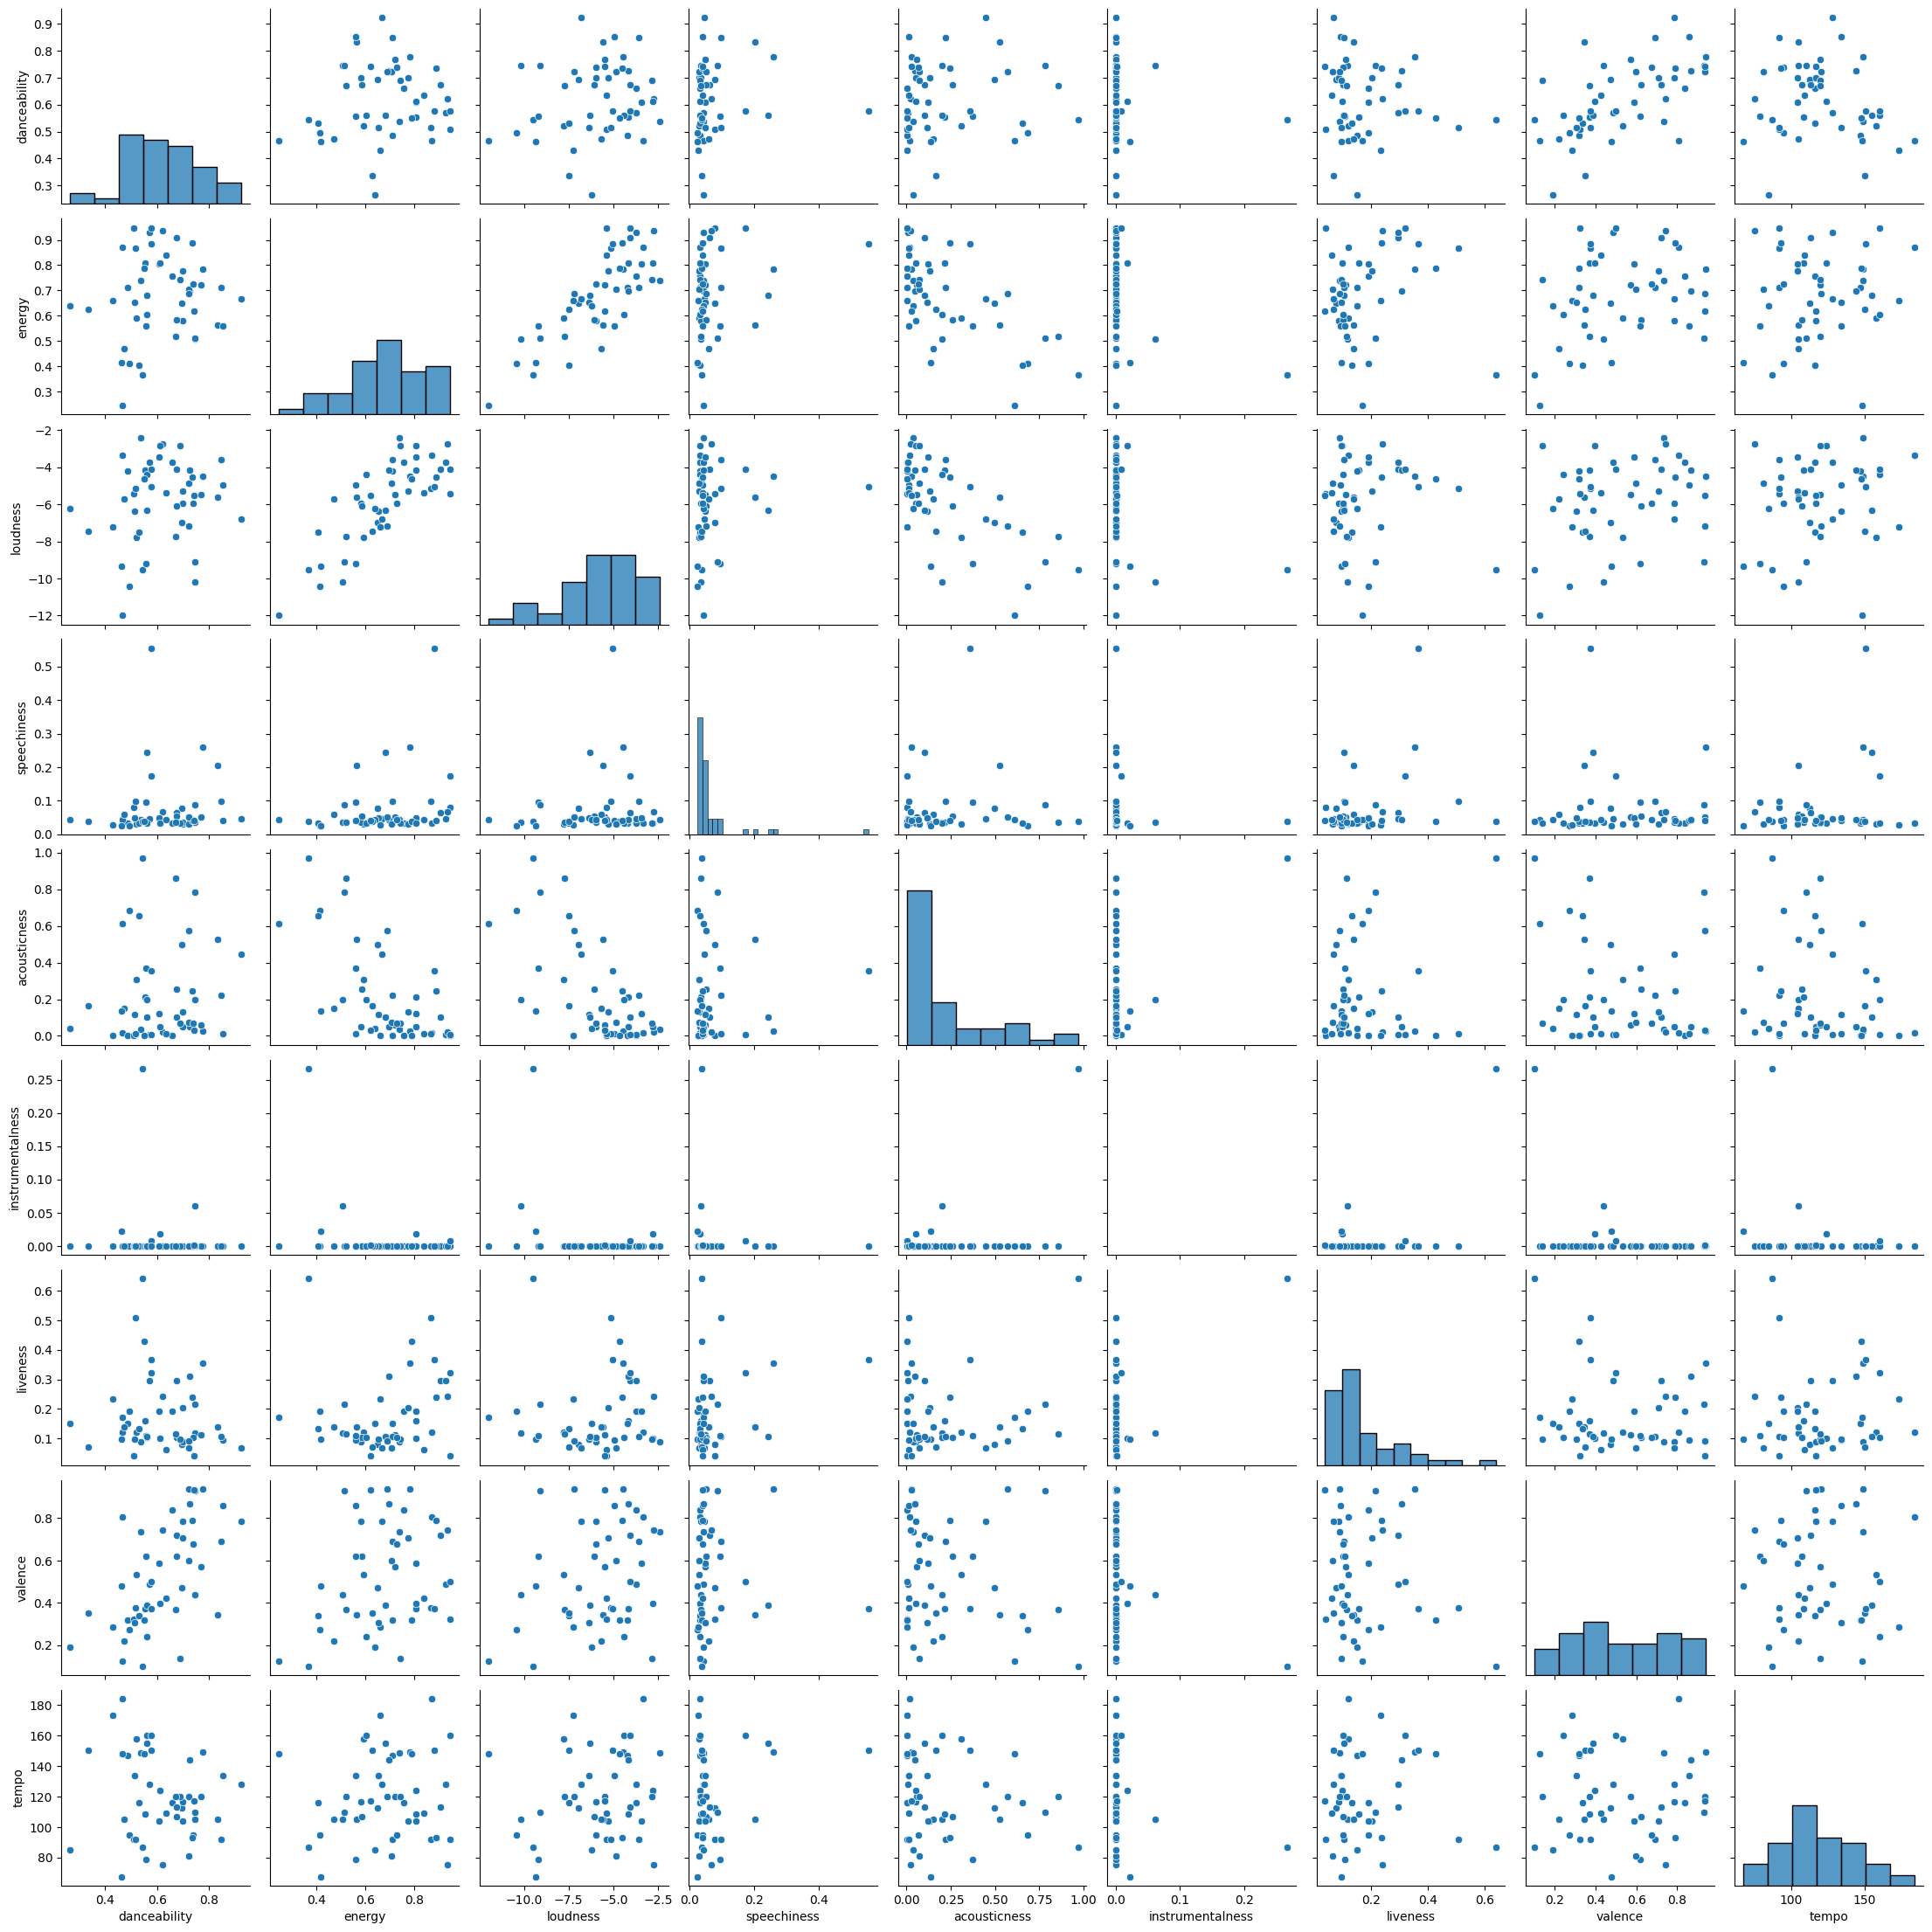

In [8]:
import seaborn as sns

sns.pairplot(top50_playlist.audio_features_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

## Audio analysis

In [16]:
audio_analysis = top50_playlist.audio_analysis(next(iter(top50_playlist)))

In [17]:
type(audio_analysis)

dict

In [18]:
list(audio_analysis)

['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums']

In [19]:
audio_analysis['meta']

{'analyzer_version': '4.0.0',
 'platform': 'Linux',
 'detailed_status': 'OK',
 'status_code': 0,
 'timestamp': 1723785476,
 'analysis_time': 5.78793,
 'input_process': 'libvorbisfile L+R 44100->22050'}

In [20]:
audio_analysis['track']

{'num_samples': 5549270,
 'duration': 251.66757,
 'sample_md5': '',
 'offset_seconds': 0,
 'window_seconds': 0,
 'analysis_sample_rate': 22050,
 'analysis_channels': 1,
 'end_of_fade_in': 0.2034,
 'start_of_fade_out': 241.98096,
 'loudness': -7.863,
 'tempo': 158.005,
 'tempo_confidence': 0.501,
 'time_signature': 3,
 'time_signature_confidence': 1.0,
 'key': 6,
 'key_confidence': 0.253,
 'mode': 0,
 'mode_confidence': 0.452,
 'codestring': 'eJxVmgcC3DgOBL-iJzCH_3_sqprjtW-jyZEoIjUaIPtcc7d7yle-eUq9586v3vb1_DBL-Q7_3tpWub3zW6_8uGvpZ47z1XPOt1pvdY2zvjZ6-0a7Y696-9dLOV9ve-5Zm2u24nDsyWpfP_zKw_XsfsbXbxlf25s13MAoLOXDbY25eY4P7dp6aWeub-y-Pp-tixGrl2-v1erY95tjNx8tc9_G0OfXvaWy5Y-HBiPX5dHtBu-qq9YzeGnvxbbGrvtcJK_t8Hrvp1-2cPiYos_Rz4f045t77dldoqHBWtYc5c5-v3v4St9nIs-9_KJenqQbUWuds6HmOu9AuxVdsfJEofNufkaffH2xcVTEg22jmnp3a4jEkM9FITzCLjRJcds8sSbL9aXqVi1n9r4Zbw3KGvdef5_lKb619_l5UFg9t652Buuvstw9wrVyHEf3bdw-DhtF5VX7lIYqfH-du2LmgQL4Ho-er1VknbVUxjHIWWuM6Am7qdfR7zk8fvjKd25DyW2w_HFRDFlaq3rc_bkNbjbL_rArn1cVK8psZbn9W-

In [21]:
from lkj import truncate_dict_values

print(f"{len(audio_analysis['bars'])=})")
truncate_dict_values(audio_analysis['bars'])

len(audio_analysis['bars'])=211)


[{'start': 1.36936, 'duration': 1.1373, 'confidence': 0.506},
 {'start': 2.50666, 'duration': 1.14286, 'confidence': 0.037}]

In [22]:
print(f"{len(audio_analysis['beats'])=})")
truncate_dict_values(audio_analysis['beats'])

len(audio_analysis['beats'])=639)


[{'start': 0.598, 'duration': 0.39454, 'confidence': 0.786},
 {'start': 0.99254, 'duration': 0.37682, 'confidence': 0.461}]

In [23]:
print(f"{len(audio_analysis['sections'])=})")
truncate_dict_values(audio_analysis['sections'])

len(audio_analysis['sections'])=10)


[{'start': 0.0,
  'duration': 9.72348,
  'confidence': 1.0,
  'loudness': -22.269,
  'tempo': 158.348,
  'tempo_confidence': 0.353,
  'key': 1,
  'key_confidence': 0.03,
  'mode': 0,
  'mode_confidence': 0.567,
  'time_signature': 3,
  'time_signature_confidence': 1.0},
 {'start': 9.72348,
  'duration': 29.24311,
  'confidence': 0.606,
  'loudness': -11.712,
  'tempo': 158.114,
  'tempo_confidence': 0.364,
  'key': 9,
  'key_confidence': 0.217,
  'mode': 1,
  'mode_confidence': 0.472,
  'time_signature': 3,
  'time_signature_confidence': 1.0}]

In [24]:
print(f"{len(audio_analysis['segments'])=})")
truncate_dict_values(audio_analysis['segments'])

len(audio_analysis['segments'])=780)


[{'start': 0.0,
  'duration': 0.2034,
  'confidence': 0.0,
  'loudness_start': -60.0,
  'loudness_max_time': 0.0,
  'loudness_max': -60.0,
  'loudness_end': 0.0,
  'pitches': [1.0, 1.0],
  'timbre': [0.0, 171.13]},
 {'start': 0.2034,
  'duration': 0.41234,
  'confidence': 1.0,
  'loudness_start': -60.0,
  'loudness_max_time': 0.05445,
  'loudness_max': -22.196,
  'loudness_end': 0.0,
  'pitches': [0.082, 0.554],
  'timbre': [33.758, 53.096]}]

In [25]:
print(f"{len(audio_analysis['tatums'])=})")
truncate_dict_values(audio_analysis['tatums'])

len(audio_analysis['tatums'])=1278)


[{'start': 0.598, 'duration': 0.19727, 'confidence': 0.786},
 {'start': 0.79527, 'duration': 0.19727, 'confidence': 0.786}]

In [ ]:
from lkj import truncate_dict_values

truncate_dict_values(audio_analysis, max_list_size=2)

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1476616359,
  'analysis_time': 109.6869,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 15594936,
  'duration': 707.25336,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 2.82703,
  'start_of_fade_out': 693.6381,
  'loudness': -10.355,
  'tempo': 106.396,
  'tempo_confidence': 0.595,
  'time_signature': 4,
  'time_signature_confidence': 0.904,
  'key': 5,
  'key_confidence': 0.049,
  'mode': 0,
  'mode_confidence': 0.228,
  'codestring': 'eJw1nQmS5LqOBK9SRxB38v4X63BHtv2...y2bmBs1qBYvtiECKLDlx_oH4Y3DGg==',
  'code_version': 3.15,
  'echoprintstring': 'eJzcnQ2u7DhzZLckUaRILkf82_8S5oT...av23MzLxruBTa5AgsAdSL_-A1nrtTE=',
  'echoprint_version': 4.12,
  'synchstring': 'eJx9mAuS5DgIRK_iI1h_6_4XW_IlclV...OPN79PfjNMgH2A-QVgPFZR_AHMBU_o=',
  'syn